In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# Output is a zip object in memory
coordinates = zip(lats, lngs)
coordinates

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | malchin
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | high prairie
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | devitsa
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | usinsk
Processing Record 10 of Set 1 | hambantota
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | raudeberg
Processing Record 13 of Set 1 | aklavik
Processing Record 14 of Set 1 | gangotri
City not found. Skipping...
Processing Record 15 of Set 1 | troitsko-pechorsk
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | estelle
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | roblin
Processing Record 21 of Set 1 | ponta do sol
Proc

In [18]:
len(city_data)

550

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Malchin,53.7333,12.7833,68.38,78,100,4.90,DE,2021-07-08 19:05:47
1,High Prairie,55.4334,-116.4858,82.71,39,13,6.55,CA,2021-07-08 19:01:51
2,Ushuaia,-54.8000,-68.3000,47.86,37,75,24.16,AR,2021-07-08 19:05:48
3,Ilulissat,69.2167,-51.1000,44.62,65,1,13.80,GL,2021-07-08 19:05:48
4,East London,-33.0153,27.9116,76.84,27,0,12.30,ZA,2021-07-08 19:05:49
5,Devitsa,51.6352,38.9450,68.49,62,7,3.78,RU,2021-07-08 19:05:49
6,Georgetown,5.4112,100.3354,82.89,87,20,0.00,MY,2021-07-08 19:05:49
7,Usinsk,65.9939,57.5281,70.25,52,100,9.17,RU,2021-07-08 19:05:50
8,Hambantota,6.1241,81.1185,80.94,94,40,8.05,LK,2021-07-08 19:05:50
9,Busselton,-33.6500,115.3333,55.04,76,33,16.75,AU,2021-07-08 19:05:50


In [20]:
new_column_order = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp','Wind Speed']
city_data_df=city_data_df[new_column_order].copy()
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Malchin,100,DE,2021-07-08 19:05:47,78,53.7333,12.7833,68.38,4.90
1,High Prairie,13,CA,2021-07-08 19:01:51,39,55.4334,-116.4858,82.71,6.55
2,Ushuaia,75,AR,2021-07-08 19:05:48,37,-54.8000,-68.3000,47.86,24.16
3,Ilulissat,1,GL,2021-07-08 19:05:48,65,69.2167,-51.1000,44.62,13.80
4,East London,0,ZA,2021-07-08 19:05:49,27,-33.0153,27.9116,76.84,12.30


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

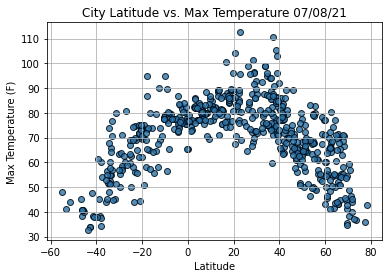

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

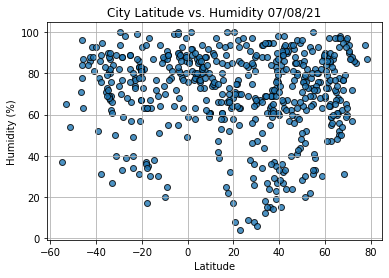

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

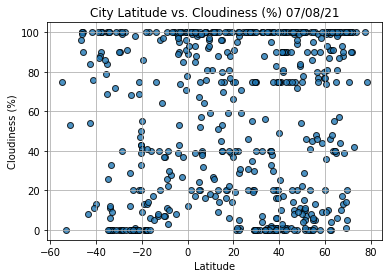

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

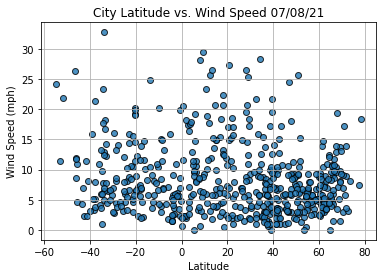

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Create northern and southern hemisphere dataframes
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] < 0)]

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsiz
    plt.title()e=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

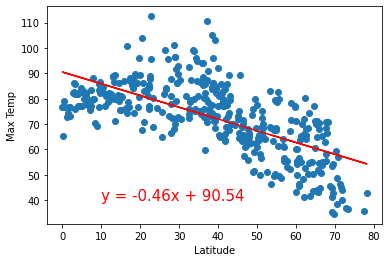

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))